### This Lab Assignment is done by CS20B1044 Avinash R Changrani

NOTE :    * Do not use the inbuilt function for implementing Linear Regression.

1. Implement the linear regression model from scratch using gradient descent.
    * Start with initializing the parameters m (slope) and c (y    *intercept) to zero.
    * Define the loss function as Mean Squared Error (MSE).
    * Calculate the gradients of the loss function with respect to m and c.
    * Update the parameters m and c using the gradients and a learning rate.
    * Iterate the above steps for a fixed number of iterations or until convergence.
    * Plot the cost function over iterations and observe if it is decreasing.
    * After the model is trained, predict the output for a given input and compare it with the actual output.

In [2]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# read the dataset and show the first 5 rows
dataset = pd.read_csv('data.csv')

dataset.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


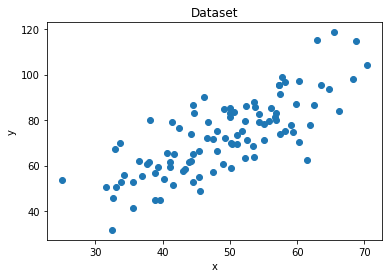

In [4]:
# plot the dataset 
plt.scatter(dataset['x'], dataset['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

### Linear Regression

Linear Regression fit equation can be given as 
$$y = mx + c$$
where y is the predicted value, m is the slope of the line and c is the y-intercept.

The objective of the linear regression model is to find the best fit line that explains the relationship between the input and output values.

The best fit line is the one that minimizes the difference between the actual and predicted values.

The cost function for linear regression is the Mean Squared Error (MSE) which is given by
$$MSE = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (mx_{i} + c))^{2}$$
where n is the number of data points, $y_{i}$ is the actual output and $x_{i}$ is the input.

The objective of the linear regression model is to minimize the cost function by finding the best values of m and c.

The gradients of the cost function with respect to m and c are given by
$$\frac{\partial MSE}{\partial m} = -\frac{1}{n} \sum_{i=1}^{n} x_{i} (y_{i} - (mx_{i} + c))$$
$$\frac{\partial MSE}{\partial c} = -\frac{1}{n} \sum_{i=1}^{n} (y_{i} - (mx_{i} + c))$$

The parameters m and c are updated using the gradients and a learning rate $\alpha$ as
$$m = m - \alpha \frac{\partial MSE}{\partial m}$$
$$c = c - \alpha \frac{\partial MSE}{\partial c}$$

iteration: 0, mse: 27825539.17245276, m: 0.36853514868102644, c: 0.0072735050553899986


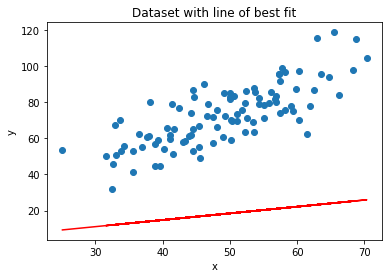

iteration: 100, mse: 563244.3049151002, m: 1.478861151321164, c: 0.03210195118454521


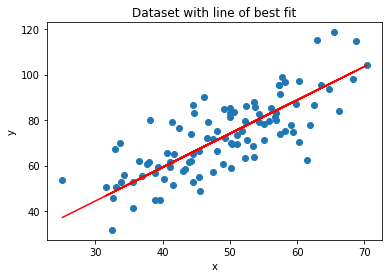

iteration: 200, mse: 563235.2831741393, m: 1.4788021276269037, c: 0.0351049839826373


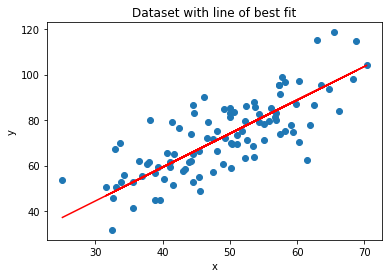

iteration: 300, mse: 563226.2682400014, m: 1.4787431262028705, c: 0.038106883686397246


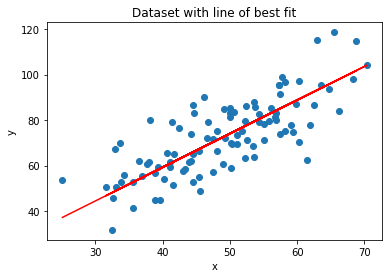

iteration: 400, mse: 563217.2601075496, m: 1.4786841470410577, c: 0.04110765072336812


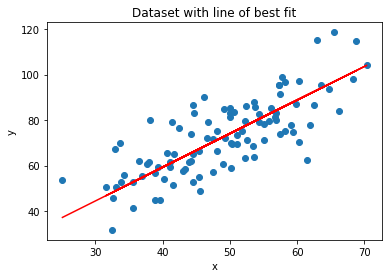

iteration: 500, mse: 563208.2587716525, m: 1.4786251901330656, c: 0.044107285520924


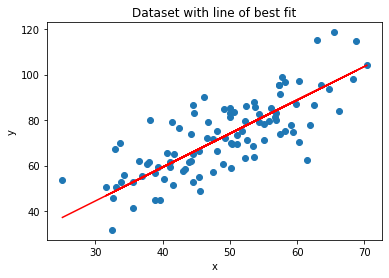

iteration: 600, mse: 563199.2642271814, m: 1.4785662554704975, c: 0.04710578850627775


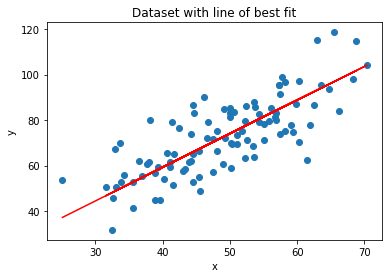

iteration: 700, mse: 563190.2764690134, m: 1.47850734304496, c: 0.05010316010648089


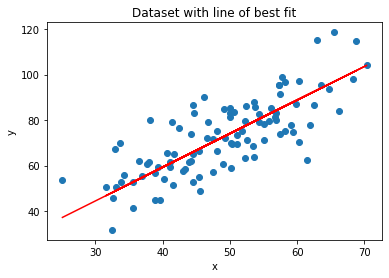

iteration: 800, mse: 563181.2954920275, m: 1.4784484528480626, c: 0.05309940074842396


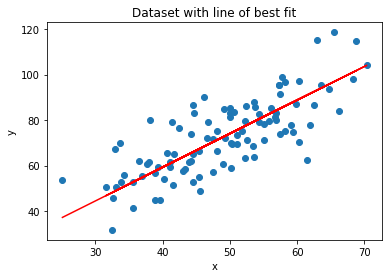

iteration: 900, mse: 563172.3212911075, m: 1.4783895848714175, c: 0.056094510858836356


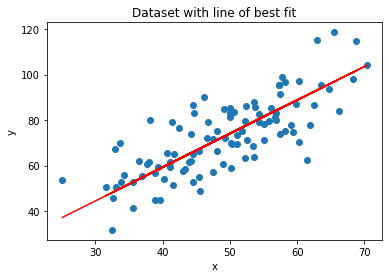

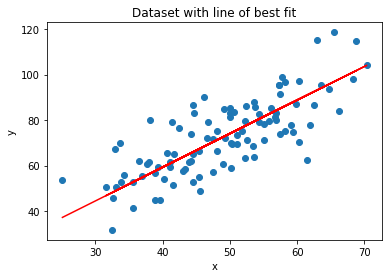

In [5]:
# implement the linear regression model from scratch using parameters m and c and using the gradient descent algorithm using MSE loss function
costs = []


def gradient_descent(x, y, m, c, learning_rate, iterations):
    n = len(x)
    for i in range(iterations):
        y_pred = m * x + c
        mse = (1/2*n) * sum([val**2 for val in (y - y_pred)])
        m_gradient = -(1/n) * sum(x * (y - y_pred))
        c_gradient = -(1/n) * sum(y - y_pred)
        m = m - learning_rate * m_gradient
        c = c - learning_rate * c_gradient
        if i % 100 == 0:
            print(f'iteration: {i}, mse: {mse}, m: {m}, c: {c}')
            plt.scatter(dataset['x'], dataset['y'])
            plt.plot(dataset['x'], m * dataset['x'] + c, color='red')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Dataset with line of best fit')
            costs.append(mse)
            plt.show()
    return m, c

# set the initial parameters and call the gradient descent function
m = 0
c = 0

learning_rate = 0.0001
iterations = 1000

m, c = gradient_descent(dataset['x'], dataset['y'], m, c, learning_rate, iterations)

# plot the dataset and the line of best fit
plt.scatter(dataset['x'], dataset['y'])
plt.plot(dataset['x'], m * dataset['x'] + c, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset with line of best fit')
plt.show()

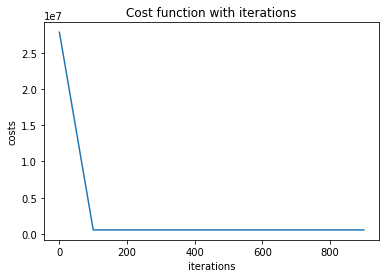

In [6]:
# plot cost function (mse) with iterations
iterations = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
plt.plot(iterations, costs)
plt.xlabel('iterations')
plt.ylabel('costs')
plt.title('Cost function with iterations')
plt.show()

In [7]:
# Predict output with the given input and compare with the given input

y_pred = m*dataset['x'] + c

df = pd.DataFrame({'Actual': dataset['y'], 'Predicted': y_pred})

df

,Actual,Predicted
0,31.707006,48.108294
1,68.777596,79.041577
2,62.562382,91.021314
3,71.546632,70.243784
4,87.230925,88.482798
...,...,...
95,81.536991,74.020233
96,72.111832,72.851746
97,85.232007,74.034131
98,66.224958,71.240503
